In [32]:
#Fastenzeit Datum
FEATURES = [
    'Temperatur',
    'Windgeschwindigkeit',
    'KielerWoche',

    'Umsatz_lag_1',
    'Umsatz_lag_7',
    'Umsatz_rolling_7',

    'WettercodeExtremwetter',
    'WettercodeDunst',
    'WettercodeKlar',
    'WettercodeNachSchlechtemWetter',
    'WettercodeNebel',
    'WettercodeRegen',
    'WettercodeSchnee',

    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread',

    'WochentagFreitag',
    'WochentagSamstag',
    'WochentagSonntag',
    'WochentagUnterDerWoche',

    'Januar',
    'Februar',
    'Maerz',
    'April',
    'Mai',
    'Juni',
    'Juli',
    'August',
    'September',
    'Oktober',
    'November',
    'Dezember',
    
    'BewoelkungWolkenBedeckt',
    'BewoelkungWolkenBewoelkt',
    'BewoelkungWolkenKlar',
    
    'FeiertagChristiHimmelfahrt',
    'FeiertagErsterMai',
    'FeiertagOstermontag',
    'FeiertagPfingstmontag',
    'FeiertagTagDerDeutschenEinheit',
    'FeiertagHeiligabend',
    'FeiertagSilvester',
    'TagVorFeiertag',
    'Fastenzeit',

]

In [33]:
import pandas as pd
import numpy as np

In [34]:
train_data = pd.read_csv('../0_DataPreparation/data/LAG_daten/train_data.csv')
val_data = pd.read_csv('../0_DataPreparation/data/LAG_daten/validation_data.csv')
test_data = pd.read_csv('../0_DataPreparation/data/LAG_daten/test_data.csv')

In [35]:


# ---- neu: Diagnose / kurzer Fix für fehlende LAG-Spalten ----
missing_in_train = [f for f in FEATURES if f not in train_data.columns]
missing_in_val   = [f for f in FEATURES if f not in val_data.columns]
missing_in_test  = [f for f in FEATURES if f not in test_data.columns]

print("fehlende Features - train:", missing_in_train)
print("fehlende Features - val:  ", missing_in_val)
print("fehlende Features - test: ", missing_in_test)

# NaN-Anteile anzeigen
for name, df in [('train', train_data), ('val', val_data), ('test', test_data)]:
    print(f"\nNaN-Anteile in {name}:")
    print(df[FEATURES].isna().mean().sort_values(ascending=False).head(10))

# Falls Lag-Spalten komplett fehlen: lege sie an (temporärer Fallback)
lag_cols = [c for c in FEATURES if 'lag' in c or 'rolling' in c]
for df in (train_data, val_data, test_data):
    for c in lag_cols:
        if c not in df.columns:
            df[c] = np.nan

# Einfaches kurzfristiges Imputieren (nur um Fehler zu vermeiden).
# Besser: Lags korrekt aus dem historischen DataFrame berechnen vor dem Split.
for df in (train_data, val_data, test_data):
    # numerische Imputation: median oder 0 abhängig von Kontext
    df[lag_cols] = df[lag_cols].fillna(0)   # <- temporär; ersetzt NaNs




fehlende Features - train: []
fehlende Features - val:   []
fehlende Features - test:  []

NaN-Anteile in train:
Umsatz_lag_7                      0.000935
Umsatz_rolling_7                  0.000801
Umsatz_lag_1                      0.000134
KielerWoche                       0.000000
Windgeschwindigkeit               0.000000
Temperatur                        0.000000
WettercodeExtremwetter            0.000000
WettercodeDunst                   0.000000
WettercodeKlar                    0.000000
WettercodeNachSchlechtemWetter    0.000000
dtype: float64

NaN-Anteile in val:
Temperatur                        0.0
Windgeschwindigkeit               0.0
KielerWoche                       0.0
Umsatz_lag_1                      0.0
Umsatz_lag_7                      0.0
Umsatz_rolling_7                  0.0
WettercodeExtremwetter            0.0
WettercodeDunst                   0.0
WettercodeKlar                    0.0
WettercodeNachSchlechtemWetter    0.0
dtype: float64

NaN-Anteile in test:
Umsa

In [36]:
X_train = train_data[FEATURES]
y_train = train_data['Umsatz']

X_val = val_data[FEATURES]
y_val = val_data['Umsatz']

X_test = test_data[FEATURES]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 192 (768.00 B)

In [39]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 64764.7617 - val_loss: 53865.8047
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61555.3672 - val_loss: 51119.5078
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57543.9375 - val_loss: 47851.7891
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52937.6133 - val_loss: 43515.2734
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47821.9883 - val_loss: 39587.1016
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42232.5898 - val_loss: 35983.0078
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36551.5234 - val_loss: 31607.0234
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31352.8613 - val_loss: 25739.0859
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26518.7129 - val_loss: 21892.2812
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22534.2598 - val_loss: 18512.9141
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18548.837

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Validation RMSE: {rmse:.2f}")


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Validation RMSE: 37.93


In [41]:
test_pred = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': test_pred.flatten()
})

submission.to_csv('../0_DataPreparation/data/submission_nn_clara_lag.csv', index=False)


 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


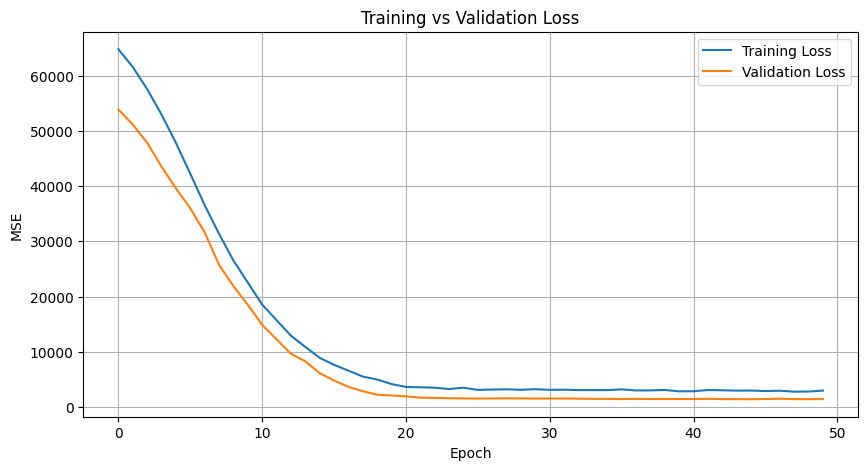

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import numpy as np

def mape(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

y_val_pred = model.predict(X_val_scaled)

val_mape = mape(y_val, y_val_pred)
print(f"Validation MAPE (overall): {val_mape:.2f}%")



44/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAPE (overall): 16.96%


In [44]:
val_results = val_data.copy()
val_results['y_true'] = y_val.values
val_results['y_pred'] = model.predict(X_val_scaled).flatten()

for wg in [
    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread'
]:
    subset = val_results[val_results[wg] == 1]
    mape_wg = mape(subset['y_true'], subset['y_pred'])
    print(f"{wg}: {mape_wg:.2f}%")



 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
WarengruppeBread: 17.03%
WarengruppeRolls: 9.91%
WarengruppeCroissants: 15.66%
WarengruppeConfectionery: 23.99%
WarengruppeCake: 13.47%
WarengruppeSeasonalBread: 46.94%


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vorhersagen machen
y_train_pred = model.predict(X_train_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()

# Metriken berechnen
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{dataset_name}:")
    print(f"  MAE:  {mae:.2f} € (durchschnittlicher Fehler)")
    print(f"  RMSE: {rmse:.2f} € (bestraft große Fehler stärker)")
    print(f"  R²:   {r2:.3f} (0-1, höher = besser)")
    print(f"  MAPE: {mape:.2f} % (Fehler in Prozent)")

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")

  1/234 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Training:
  MAE:  24.56 € (durchschnittlicher Fehler)
  RMSE: 35.27 € (bestraft große Fehler stärker)
  R²:   0.943 (0-1, höher = besser)
  MAPE: 15.36 % (Fehler in Prozent)

Validation:
  MAE:  26.62 € (durchschnittlicher Fehler)
  RMSE: 37.93 € (bestraft große Fehler stärker)
  R²:   0.915 (0-1, höher = besser)
  MAPE: 16.96 % (Fehler in Prozent)


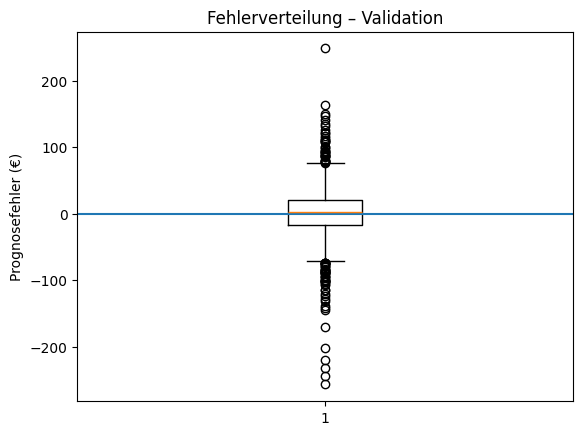

<Figure size 640x480 with 0 Axes>

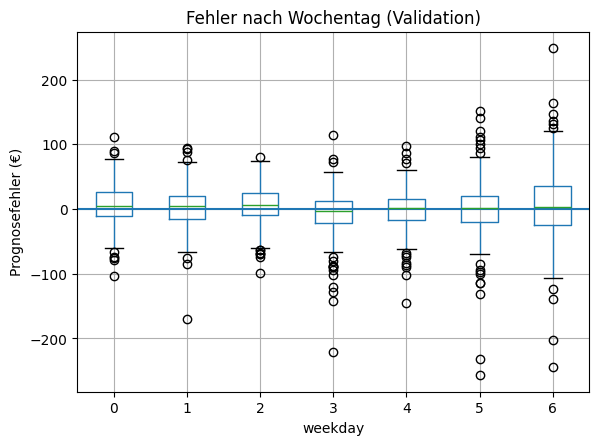

In [46]:

# Fehler berechnen
train_errors = y_train_pred - y_train
val_errors   = y_val_pred   - y_val

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(val_errors)
plt.axhline(0)
plt.ylabel("Prognosefehler (€)")
plt.title("Fehlerverteilung – Validation")
plt.show()

import pandas as pd

df_val = val_data.copy()
df_val["weekday"] = pd.to_datetime(df_val["Datum"]).dt.weekday
weekday_val = df_val["weekday"]

df_val_plot = pd.DataFrame({
    "error": val_errors,
    "weekday": weekday_val
})

plt.figure()
df_val_plot.boxplot(column="error", by="weekday")
plt.axhline(0)
plt.ylabel("Prognosefehler (€)")
plt.title("Fehler nach Wochentag (Validation)")
plt.suptitle("")
plt.show()
